In [40]:
 '''
"I (We) certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I (we) did not receive
any external help, coaching or contributions during the production of this work."
'''

'\n"I (We) certify that the code and data in this assignment were generated independently,\nusing only the tools and resources defined in the course and that I (we) did not receive\nany external help, coaching or contributions during the production of this work."\n'

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout

In [42]:
df = pd.read_csv("./income_dataset.csv")
data = pd.DataFrame(df)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


In [43]:
data['native.country'].value_counts().head(5)

United-States    29170
Mexico             643
?                  583
Philippines        198
Germany            137
Name: native.country, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32560 non-null  float64
 3   education       32561 non-null  object 
 4   education.num   32561 non-null  int64  
 5   marital.status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   capital.gain    32561 non-null  int64  
 9   capital.loss    32561 non-null  int64  
 10  hours.per.week  32561 non-null  int64  
 11  native.country  32561 non-null  object 
 12  income          32561 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 3.2+ MB


In [45]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256000e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897801e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055511e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [46]:
df.shape

(32561, 13)

In [47]:
data.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            1
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [48]:
df.dropna(inplace=True)

In [49]:
df[df['workclass']=='?'].count()

age               1835
workclass         1835
fnlwgt            1835
education         1835
education.num     1835
marital.status    1835
occupation        1835
relationship      1835
capital.gain      1835
capital.loss      1835
hours.per.week    1835
native.country    1835
income            1835
dtype: int64

In [50]:

df[df['education']=='?'].count()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [51]:
df[df['fnlwgt']=='?'].count()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [52]:
df[df['education.num']=='?'].count()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [53]:
df[df['occupation']=='?'].count()

age               1842
workclass         1842
fnlwgt            1842
education         1842
education.num     1842
marital.status    1842
occupation        1842
relationship      1842
capital.gain      1842
capital.loss      1842
hours.per.week    1842
native.country    1842
income            1842
dtype: int64

In [54]:
df[df['relationship']=='?'].count()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [55]:

df[df['capital.gain']=='?'].count()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [56]:
df[df['capital.loss']=='?'].count()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [57]:
df[df['hours.per.week']=='?'].count()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [58]:
df[df['native.country']=='?'].count()

age               583
workclass         583
fnlwgt            583
education         583
education.num     583
marital.status    583
occupation        583
relationship      583
capital.gain      583
capital.loss      583
hours.per.week    583
native.country    583
income            583
dtype: int64

In [59]:
df[df['marital.status']=='?'].count()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [60]:
df = df[df['workclass']!='?']

In [61]:
df = df[df['occupation']!='?']

In [62]:
native_country = data[data['native.country']!='?']

In [63]:
df = df.rename(columns={'marital.status': 'marital_status'})
df = df.rename(columns={'native.country': 'native_country'})

In [64]:
df.workclass.astype('category')
df.education.astype('category')
df.marital_status.astype('category')
df.occupation.astype('category')
df.relationship.astype('category')
df.native_country.astype('category')

1        United-States
3        United-States
4        United-States
5        United-States
6        United-States
             ...      
32556    United-States
32557    United-States
32558    United-States
32559    United-States
32560    United-States
Name: native_country, Length: 30718, dtype: category
Categories (42, object): ['?', 'Cambodia', 'Canada', 'China', ..., 'Trinadad&Tobago',
                          'United-States', 'Vietnam', 'Yugoslavia']

In [65]:
df['workclass'] = pd.factorize(df.workclass)[0]
df['education'] = pd.factorize(df.education)[0]
df['marital_status'] = pd.factorize(df.marital_status)[0]
df['occupation'] = pd.factorize(df.occupation)[0]
df['relationship'] = pd.factorize(df.relationship)[0]
df['native_country'] = pd.factorize(df.native_country)[0]
df['income'] = pd.factorize(df.income)[0]

In [66]:
df.head(25)
df.workclass.unique()

array([0, 1, 2, 3, 4, 5, 6])

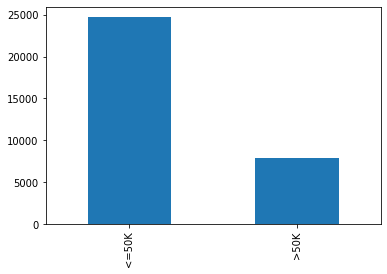

In [67]:
# As our output column is income, the graph show number of people with less than and greater than 50k income.
data['income'].value_counts().plot(kind = 'bar')

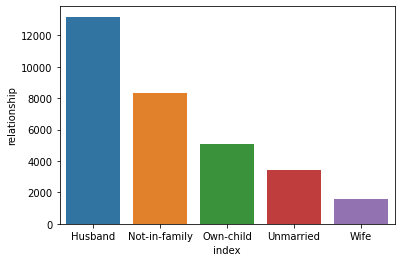

In [68]:
ss = pd.DataFrame(data["relationship"].unique())
status = pd.DataFrame(data['relationship'].value_counts().head())

status.reset_index(level=0, inplace=True)

sns.barplot(x = status['index'], y = status['relationship'], data = status)

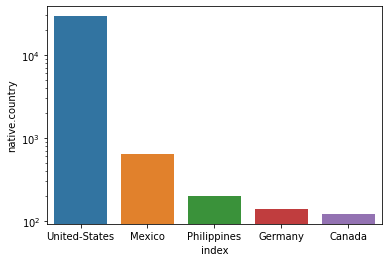

In [69]:
native_country['native.country'].value_counts().head(5)

country_plot = pd.DataFrame(native_country['native.country'].value_counts().head(5))

country_plot.reset_index(level=0, inplace=True)

bar = sns.barplot(x = country_plot['index'], y = country_plot['native.country'], data = country_plot)
bar.set_yscale('log')

In [70]:
# To select input features(X) and output features(y)
features = df.iloc[:,0:12]
output = df.iloc[:,12]

In [71]:
sc= StandardScaler()
features_n = sc.fit_transform(features)

In [72]:
features_n

array([[ 3.32035145, -0.53183668, -0.03590382, ..., 10.51912603,
        -1.91480644, -0.24290208],
       [ 1.18588199, -0.53183668, -0.46927849, ...,  9.39500591,
        -0.0792072 , -0.24290208],
       [ 0.19487831, -0.53183668,  0.70944902, ...,  9.39500591,
        -0.0792072 , -0.24290208],
       ...,
       [ 0.11864726, -0.53183668, -0.33637958, ..., -0.2191793 ,
        -0.0792072 , -0.24290208],
       [ 1.4908062 , -0.53183668, -0.35974476, ..., -0.2191793 ,
        -0.0792072 , -0.24290208],
       [-1.25351168, -0.53183668,  0.11040351, ..., -0.2191793 ,
        -1.74793378, -0.24290208]])

In [73]:
output

1        0
3        0
4        0
5        0
6        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30718, dtype: int64

In [74]:
# Training and Testing of features
X_train, X_test, y_train, y_test = train_test_split(features_n, output, test_size = 0.2)

In [75]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24574, 12) (24574,)
(6144, 12) (6144,)


In [76]:
# sc = StandardScaler()
# X_train_sc = sc.fit(X_train)
# X_test_sc = sc.fit(X_test)

In [77]:
income_model = Sequential()
# As we have 14 input features input_dim = 14, Dense is the number of neurons in hidden layer, Activation function is Relu
income_model.add(Dense(16, input_dim = 12, activation = 'relu'))
income_model.add(Dense(8, activation = 'relu'))
income_model.add(Dense(4, activation = 'relu'))
#As this is a classification problem our Dense will be 1 and activation function will be sigmoid
income_model.add(Dense(1, activation = 'sigmoid'))

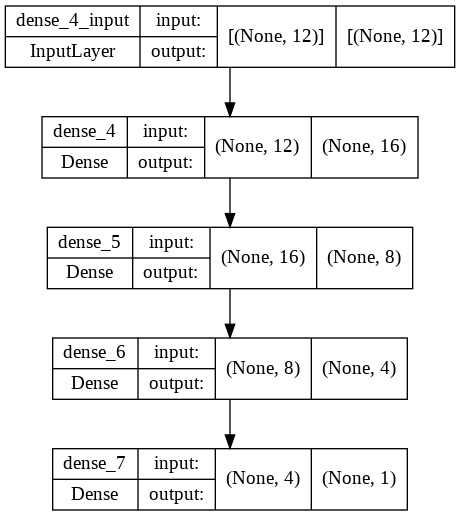

In [78]:
from keras.utils.vis_utils import plot_model
plot_model(income_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [79]:
#Loss function we use here is Binary_crossentropy
income_model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'], )
history = income_model.fit(X_train, y_train, epochs = 120, batch_size = 300, validation_data = (X_test, y_test), shuffle=False)

Epoch 1/120
82/82 [==============================] - 1s 7ms/step - loss: 0.5163 - accuracy: 0.7526 - val_loss: 0.4301 - val_accuracy: 0.8021
Epoch 2/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3979 - accuracy: 0.8185 - val_loss: 0.3796 - val_accuracy: 0.8224
Epoch 3/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3711 - accuracy: 0.8266 - val_loss: 0.3677 - val_accuracy: 0.8296
Epoch 4/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3617 - accuracy: 0.8316 - val_loss: 0.3607 - val_accuracy: 0.8307
Epoch 5/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3555 - accuracy: 0.8338 - val_loss: 0.3557 - val_accuracy: 0.8335
Epoch 6/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3506 - accuracy: 0.8367 - val_loss: 0.3516 - val_accuracy: 0.8353
Epoch 7/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3466 - accuracy: 0.8384 - val_loss: 0.3484 - val_accuracy: 0.8356
Epoch 8/120
8

In [80]:
income_score, income_acc = income_model.evaluate(X_test, y_test, batch_size= 300)

21/21 [==============================] - 0s 3ms/step - loss: 0.3337 - accuracy: 0.8438


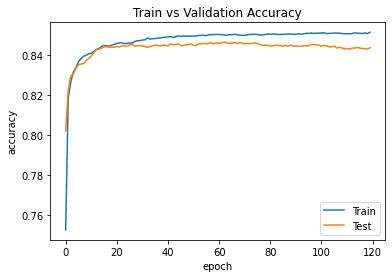

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Train vs Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

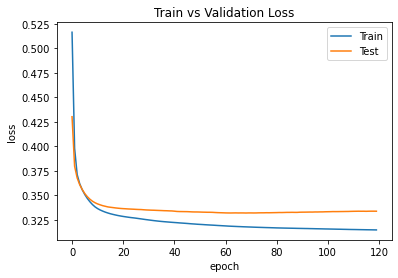

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Train vs Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

In [83]:
# Part 2

In [84]:
# Observing the results by changing the hyper parameters

Epoch 1/120
82/82 [==============================] - 1s 7ms/step - loss: 0.6432 - accuracy: 0.7192 - val_loss: 0.5701 - val_accuracy: 0.7891
Epoch 2/120
82/82 [==============================] - 0s 5ms/step - loss: 0.5074 - accuracy: 0.7925 - val_loss: 0.4248 - val_accuracy: 0.8089
Epoch 3/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4136 - accuracy: 0.8111 - val_loss: 0.3793 - val_accuracy: 0.8184
Epoch 4/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3807 - accuracy: 0.8157 - val_loss: 0.3663 - val_accuracy: 0.8229
Epoch 5/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3740 - accuracy: 0.8128 - val_loss: 0.3601 - val_accuracy: 0.8267
Epoch 6/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3657 - accuracy: 0.8165 - val_loss: 0.3550 - val_accuracy: 0.8327
Epoch 7/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3627 - accuracy: 0.8183 - val_loss: 0.3515 - val_accuracy: 0.8343
Epoch 8/120
8

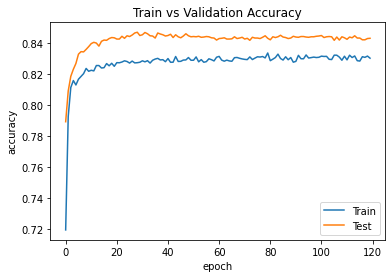

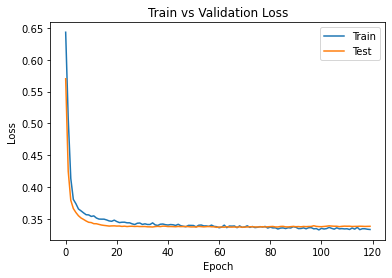

[0.8522828817367554]
[0.31530648469924927]
[0.8429362177848816]
[0.3384402096271515]
Epoch 1/120
82/82 [==============================] - 1s 7ms/step - loss: 0.5798 - accuracy: 0.7506 - val_loss: 0.4743 - val_accuracy: 0.7523
Epoch 2/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4623 - accuracy: 0.7517 - val_loss: 0.4022 - val_accuracy: 0.7581
Epoch 3/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4147 - accuracy: 0.7956 - val_loss: 0.3855 - val_accuracy: 0.8263
Epoch 4/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3958 - accuracy: 0.7979 - val_loss: 0.3729 - val_accuracy: 0.8231
Epoch 5/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3863 - accuracy: 0.8029 - val_loss: 0.3651 - val_accuracy: 0.8268
Epoch 6/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3823 - accuracy: 0.8065 - val_loss: 0.3602 - val_accuracy: 0.8296
Epoch 7/120
82/82 [==============================] - 0s 5ms/step - lo

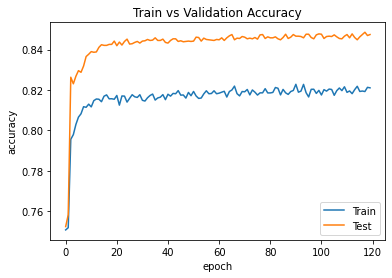

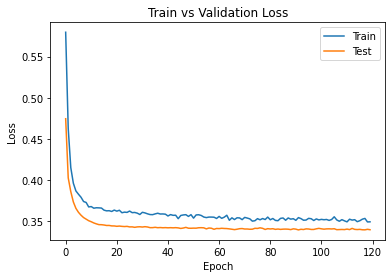

[0.8522828817367554, 0.8495157361030579]
[0.31530648469924927, 0.3201947808265686]
[0.8429362177848816, 0.8474934697151184]
[0.3384402096271515, 0.33901703357696533]
Epoch 1/120
82/82 [==============================] - 1s 7ms/step - loss: 0.6036 - accuracy: 0.7421 - val_loss: 0.4949 - val_accuracy: 0.7523
Epoch 2/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4954 - accuracy: 0.7506 - val_loss: 0.4221 - val_accuracy: 0.7523
Epoch 3/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4337 - accuracy: 0.7506 - val_loss: 0.4027 - val_accuracy: 0.7523
Epoch 4/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4153 - accuracy: 0.7506 - val_loss: 0.3938 - val_accuracy: 0.7523
Epoch 5/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4073 - accuracy: 0.7506 - val_loss: 0.3902 - val_accuracy: 0.7523
Epoch 6/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4019 - accuracy: 0.7506 - val_loss: 0.3879 - val_accur

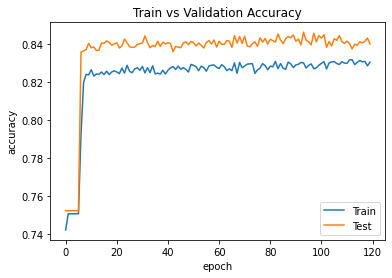

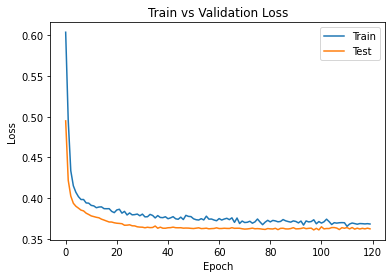

[0.8522828817367554, 0.8495157361030579, 0.8504109978675842]
[0.31530648469924927, 0.3201947808265686, 0.3361748158931732]
[0.8429362177848816, 0.8474934697151184, 0.8401692509651184]
[0.3384402096271515, 0.33901703357696533, 0.36249420046806335]


In [85]:
dr_iter = [0.2,0.3,0.4]

train_acc1 = []
train_loss1 = []
test_acc1 = []
test_loss1 = []

for i in dr_iter:
  income_model = Sequential()
  # As we have 14 input features input_dim = 14, Dense is the number of neurons in hidden layer, Activation function is Relu
  income_model.add(Dense(16, input_dim = 12, activation = 'relu'))
  income_model.add(Dense(8, activation = 'relu'))
  income_model.add(Dense(4, activation = 'relu'))
  income_model.add(Dropout(i))
  #As this is a classification problem our Dense will be 1 and activation function will be sigmoid
  income_model.add(Dense(1, activation = 'sigmoid'))

  #Loss function we use here is Mean Squared Error
  income_model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
  history = income_model.fit(X_train, y_train, epochs = 120, batch_size = 300, validation_data=(X_test, y_test))

  evaluate_train = income_model.evaluate(X_train, y_train, verbose=0)
  evaluate_test = income_model.evaluate(X_test, y_test, verbose=0)
  print('Test loss:', round(evaluate_test[0],4)*100)
  print('Test accuracy:', round(evaluate_test[1],4)*100)
  print('Train loss:', round(evaluate_train[0],4)*100)
  print('Train accuracy:', round(evaluate_train[1],4)*100)


  train_acc1.append(evaluate_train[1])
  test_acc1.append(evaluate_test[1])
  train_loss1.append(evaluate_train[0])
  test_loss1.append(evaluate_test[0])

    # Train vs Test Accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])

  plt.title('Train vs Validation Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['Train', 'Test'])
  plt.show()

  # Train vs Test loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.title('Train vs Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'])
  plt.show()

  print(train_acc1)
  print(train_loss1)
  print(test_acc1)
  print(test_loss1)

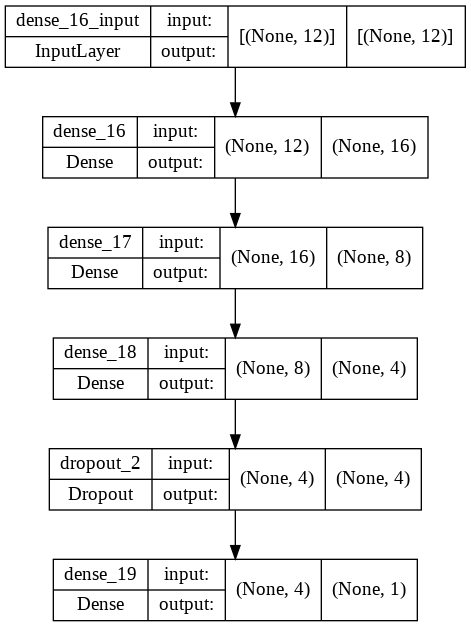

In [86]:
from keras.utils.vis_utils import plot_model
plot_model(income_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/120
82/82 [==============================] - 2s 7ms/step - loss: 0.5770 - accuracy: 0.7669 - val_loss: 0.4788 - val_accuracy: 0.7869
Epoch 2/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4497 - accuracy: 0.7930 - val_loss: 0.4010 - val_accuracy: 0.8153
Epoch 3/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4100 - accuracy: 0.8079 - val_loss: 0.3808 - val_accuracy: 0.8254
Epoch 4/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3939 - accuracy: 0.8207 - val_loss: 0.3707 - val_accuracy: 0.8298
Epoch 5/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3844 - accuracy: 0.8265 - val_loss: 0.3629 - val_accuracy: 0.8324
Epoch 6/120
82/82 [==============================] - 0s 6ms/step - loss: 0.3742 - accuracy: 0.8289 - val_loss: 0.3561 - val_accuracy: 0.8363
Epoch 7/120
82/82 [==============================] - 0s 6ms/step - loss: 0.3717 - accuracy: 0.8300 - val_loss: 0.3515 - val_accuracy: 0.8364
Epoch 8/120
8

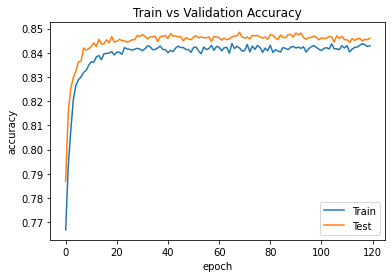

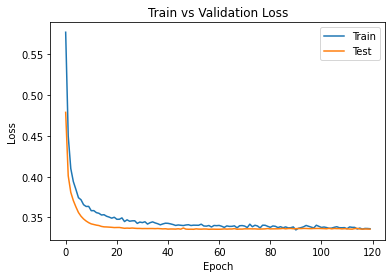

Epoch 1/120
82/82 [==============================] - 1s 7ms/step - loss: 0.5994 - accuracy: 0.7506 - val_loss: 0.5899 - val_accuracy: 0.7523
Epoch 2/120
82/82 [==============================] - 0s 5ms/step - loss: 0.5988 - accuracy: 0.7506 - val_loss: 0.5895 - val_accuracy: 0.7523
Epoch 3/120
82/82 [==============================] - 0s 5ms/step - loss: 0.5996 - accuracy: 0.7506 - val_loss: 0.5891 - val_accuracy: 0.7523
Epoch 4/120
82/82 [==============================] - 0s 5ms/step - loss: 0.5980 - accuracy: 0.7506 - val_loss: 0.5887 - val_accuracy: 0.7523
Epoch 5/120
82/82 [==============================] - 0s 5ms/step - loss: 0.5983 - accuracy: 0.7506 - val_loss: 0.5883 - val_accuracy: 0.7523
Epoch 6/120
82/82 [==============================] - 0s 5ms/step - loss: 0.5984 - accuracy: 0.7506 - val_loss: 0.5879 - val_accuracy: 0.7523
Epoch 7/120
82/82 [==============================] - 0s 5ms/step - loss: 0.5977 - accuracy: 0.7506 - val_loss: 0.5874 - val_accuracy: 0.7523
Epoch 8/120
8

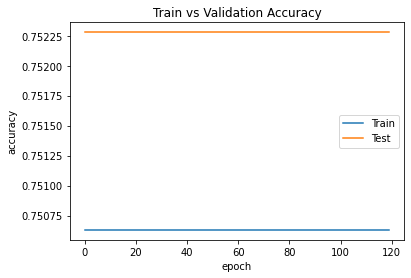

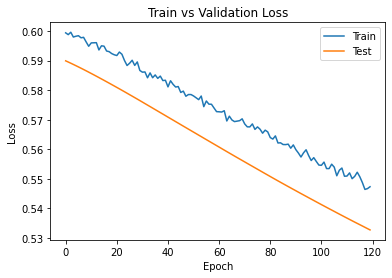

Epoch 1/120
82/82 [==============================] - 1s 7ms/step - loss: 0.6975 - accuracy: 0.5566 - val_loss: 0.6908 - val_accuracy: 0.5664
Epoch 2/120
82/82 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.6193 - val_loss: 0.6827 - val_accuracy: 0.6258
Epoch 3/120
82/82 [==============================] - 0s 5ms/step - loss: 0.6799 - accuracy: 0.6562 - val_loss: 0.6768 - val_accuracy: 0.6663
Epoch 4/120
82/82 [==============================] - 0s 5ms/step - loss: 0.6743 - accuracy: 0.6836 - val_loss: 0.6720 - val_accuracy: 0.6945
Epoch 5/120
82/82 [==============================] - 0s 5ms/step - loss: 0.6702 - accuracy: 0.7030 - val_loss: 0.6679 - val_accuracy: 0.7140
Epoch 6/120
82/82 [==============================] - 0s 5ms/step - loss: 0.6659 - accuracy: 0.7190 - val_loss: 0.6642 - val_accuracy: 0.7280
Epoch 7/120
82/82 [==============================] - 0s 5ms/step - loss: 0.6627 - accuracy: 0.7297 - val_loss: 0.6608 - val_accuracy: 0.7375
Epoch 8/120
8

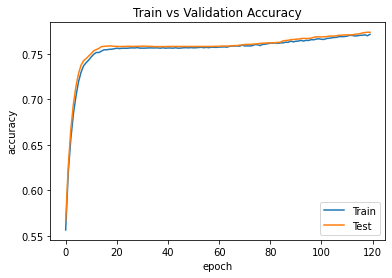

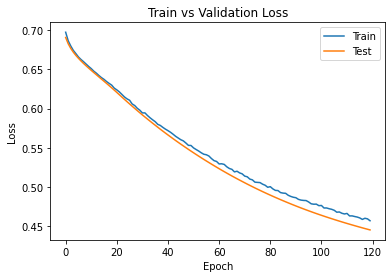

[0.850085437297821, 0.7506307363510132, 0.7741515636444092]
[0.3179740011692047, 0.5330655574798584, 0.44066908955574036]
[0.8460286259651184, 0.7522786259651184, 0.7737630009651184]
[0.33569446206092834, 0.5326865911483765, 0.4452756941318512]


In [87]:
optimizer_iter = ['RMSprop','Adadelta','Adagrad']

train_acc2 = []
train_loss2 = []
test_acc2 = []
test_loss2 = []

for i in optimizer_iter:
  income_model = Sequential()
  # As we have 14 input features input_dim = 14, Dense is the number of neurons in hidden layer, Activation function is Relu
  income_model.add(Dense(16, input_dim = 12, activation = 'relu'))
  income_model.add(Dense(8, activation = 'relu'))
  income_model.add(Dense(4, activation = 'relu'))
  income_model.add(Dropout(0.2))
  #As this is a classification problem our Dense will be 1 and activation function will be sigmoid
  income_model.add(Dense(1, activation = 'sigmoid'))

  #Loss function we use here is Mean Squared Error
  income_model.compile(loss = 'binary_crossentropy',optimizer = i, metrics = ['accuracy'])
  history = income_model.fit(X_train, y_train, epochs = 120, batch_size = 300, validation_data=(X_test, y_test))

  evaluate_train = income_model.evaluate(X_train, y_train, verbose=0)
  evaluate_test = income_model.evaluate(X_test, y_test, verbose=0)
  print('Test loss:', round(evaluate_test[0],4)*100)
  print('Test accuracy:', round(evaluate_test[1],4)*100)
  print('Train loss:', round(evaluate_train[0],4)*100)
  print('Train accuracy:', round(evaluate_train[1],4)*100)


  train_acc2.append(evaluate_train[1])
  test_acc2.append(evaluate_test[1])
  train_loss2.append(evaluate_train[0])
  test_loss2.append(evaluate_test[0])

    # Train vs Test Accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])

  plt.title('Train vs Validation Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['Train', 'Test'])
  plt.show()

  # Train vs Test loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.title('Train vs Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'])
  plt.show()

print(train_acc2)
print(train_loss2)
print(test_acc2)
print(test_loss2)

Epoch 1/120
82/82 [==============================] - 1s 7ms/step - loss: 0.5215 - accuracy: 0.7393 - val_loss: 0.4337 - val_accuracy: 0.7523
Epoch 2/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4308 - accuracy: 0.7506 - val_loss: 0.4038 - val_accuracy: 0.7523
Epoch 3/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4078 - accuracy: 0.7716 - val_loss: 0.3937 - val_accuracy: 0.8232
Epoch 4/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3975 - accuracy: 0.8214 - val_loss: 0.3874 - val_accuracy: 0.8260
Epoch 5/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3913 - accuracy: 0.8277 - val_loss: 0.3819 - val_accuracy: 0.8309
Epoch 6/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3871 - accuracy: 0.8277 - val_loss: 0.3780 - val_accuracy: 0.8337
Epoch 7/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3816 - accuracy: 0.8321 - val_loss: 0.3751 - val_accuracy: 0.8353
Epoch 8/120
8

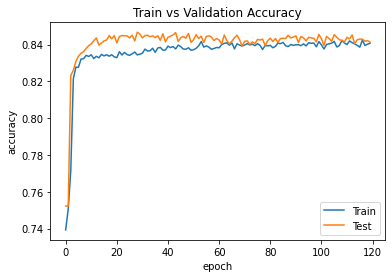

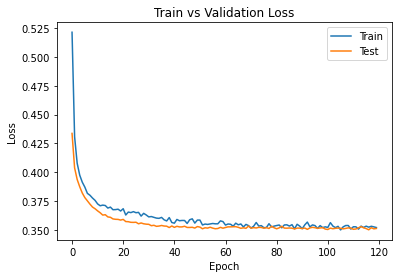

Epoch 1/120
82/82 [==============================] - 1s 7ms/step - loss: 0.5711 - accuracy: 0.6721 - val_loss: 0.4701 - val_accuracy: 0.7707
Epoch 2/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4656 - accuracy: 0.7635 - val_loss: 0.3992 - val_accuracy: 0.8151
Epoch 3/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4094 - accuracy: 0.7936 - val_loss: 0.3717 - val_accuracy: 0.8258
Epoch 4/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3900 - accuracy: 0.8074 - val_loss: 0.3625 - val_accuracy: 0.8324
Epoch 5/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3802 - accuracy: 0.8169 - val_loss: 0.3570 - val_accuracy: 0.8350
Epoch 6/120
82/82 [==============================] - 0s 6ms/step - loss: 0.3750 - accuracy: 0.8187 - val_loss: 0.3535 - val_accuracy: 0.8372
Epoch 7/120
82/82 [==============================] - 0s 5ms/step - loss: 0.3704 - accuracy: 0.8207 - val_loss: 0.3504 - val_accuracy: 0.8400
Epoch 8/120
8

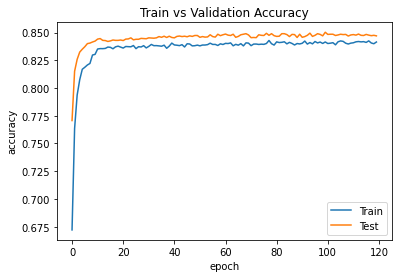

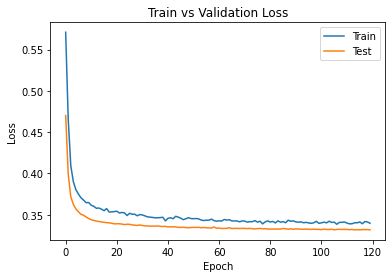

Epoch 1/120
82/82 [==============================] - 2s 8ms/step - loss: 0.5434 - accuracy: 0.7687 - val_loss: 0.4663 - val_accuracy: 0.8205
Epoch 2/120
82/82 [==============================] - 0s 6ms/step - loss: 0.4361 - accuracy: 0.8305 - val_loss: 0.4045 - val_accuracy: 0.8319
Epoch 3/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4000 - accuracy: 0.8341 - val_loss: 0.3809 - val_accuracy: 0.8333
Epoch 4/120
82/82 [==============================] - 0s 6ms/step - loss: 0.3856 - accuracy: 0.8365 - val_loss: 0.3714 - val_accuracy: 0.8361
Epoch 5/120
82/82 [==============================] - 0s 6ms/step - loss: 0.3774 - accuracy: 0.8375 - val_loss: 0.3653 - val_accuracy: 0.8366
Epoch 6/120
82/82 [==============================] - 0s 6ms/step - loss: 0.3705 - accuracy: 0.8378 - val_loss: 0.3611 - val_accuracy: 0.8358
Epoch 7/120
82/82 [==============================] - 0s 6ms/step - loss: 0.3678 - accuracy: 0.8388 - val_loss: 0.3576 - val_accuracy: 0.8385
Epoch 8/120
8

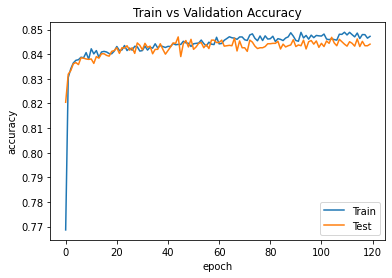

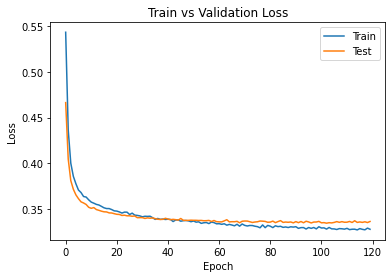

Epoch 1/120
82/82 [==============================] - 2s 8ms/step - loss: 0.6102 - accuracy: 0.6773 - val_loss: 0.5186 - val_accuracy: 0.7905
Epoch 2/120
82/82 [==============================] - 0s 6ms/step - loss: 0.4679 - accuracy: 0.8144 - val_loss: 0.4277 - val_accuracy: 0.8226
Epoch 3/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4134 - accuracy: 0.8266 - val_loss: 0.3923 - val_accuracy: 0.8283
Epoch 4/120
82/82 [==============================] - 0s 6ms/step - loss: 0.3917 - accuracy: 0.8317 - val_loss: 0.3758 - val_accuracy: 0.8317
Epoch 5/120
82/82 [==============================] - 0s 6ms/step - loss: 0.3778 - accuracy: 0.8348 - val_loss: 0.3667 - val_accuracy: 0.8345
Epoch 6/120
82/82 [==============================] - 0s 6ms/step - loss: 0.3721 - accuracy: 0.8370 - val_loss: 0.3613 - val_accuracy: 0.8348
Epoch 7/120
82/82 [==============================] - 0s 6ms/step - loss: 0.3671 - accuracy: 0.8368 - val_loss: 0.3575 - val_accuracy: 0.8366
Epoch 8/120
8

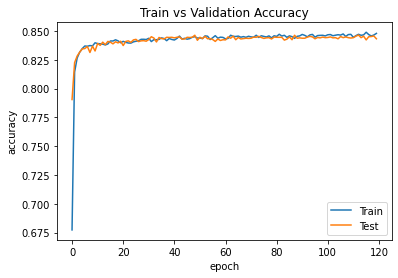

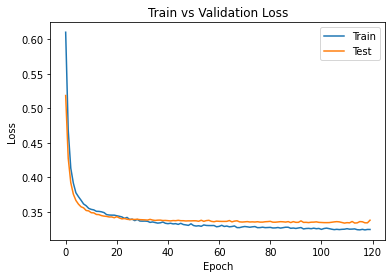

[0.8528525829315186, 0.8485798239707947, 0.8517946004867554, 0.8490274548530579]
[0.3293740749359131, 0.3217528760433197, 0.31750237941741943, 0.31737595796585083]
[0.84130859375, 0.8470051884651184, 0.8440755009651184, 0.84326171875]
[0.35114786028862, 0.331583708524704, 0.33609458804130554, 0.3380681276321411]


In [88]:
activation_iter = ['relu','softplus','softsign','tanh']

train_acc3 = []
train_loss3 = []
test_acc3 = []
test_loss3 = []

for i in activation_iter:
  income_model = Sequential()
  # As we have 14 input features input_dim = 14, Dense is the number of neurons in hidden layer, Activation function is Relu
  income_model.add(Dense(16, input_dim = 12, activation = i))
  income_model.add(Dense(8, activation = i))
  income_model.add(Dense(4, activation = i))
  income_model.add(Dropout(0.2))
  #As this is a classification problem our Dense will be 1 and activation function will be sigmoid
  income_model.add(Dense(1, activation = 'sigmoid'))

  #Loss function we use here is Mean Squared Error
  income_model.compile(loss = 'binary_crossentropy',optimizer = 'RMSprop', metrics = ['accuracy'])
  history = income_model.fit(X_train, y_train, epochs = 120, batch_size = 300, validation_data=(X_test, y_test))

  evaluate_train = income_model.evaluate(X_train, y_train, verbose=0)
  evaluate_test = income_model.evaluate(X_test, y_test, verbose=0)
  print('Test loss:', round(evaluate_test[0],4)*100)
  print('Test accuracy:', round(evaluate_test[1],4)*100)
  print('Train loss:', round(evaluate_train[0],4)*100)
  print('Train accuracy:', round(evaluate_train[1],4)*100)


  train_acc3.append(evaluate_train[1])
  test_acc3.append(evaluate_test[1])
  train_loss3.append(evaluate_train[0])
  test_loss3.append(evaluate_test[0])

    # Train vs Test Accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])

  plt.title('Train vs Validation Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['Train', 'Test'])
  plt.show()

  # Train vs Test loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.title('Train vs Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'])
  plt.show()

print(train_acc3)
print(train_loss3)
print(test_acc3)
print(test_loss3)

Selected Base Line Model

Epoch 1/120
82/82 [==============================] - 1s 7ms/step - loss: 0.6905 - accuracy: 0.6827 - val_loss: 0.6595 - val_accuracy: 0.7892
Epoch 2/120
82/82 [==============================] - 0s 5ms/step - loss: 0.6421 - accuracy: 0.8043 - val_loss: 0.6247 - val_accuracy: 0.8201
Epoch 3/120
82/82 [==============================] - 0s 6ms/step - loss: 0.6123 - accuracy: 0.8223 - val_loss: 0.5985 - val_accuracy: 0.8263
Epoch 4/120
82/82 [==============================] - 0s 5ms/step - loss: 0.5878 - accuracy: 0.8290 - val_loss: 0.5705 - val_accuracy: 0.8306
Epoch 5/120
82/82 [==============================] - 0s 5ms/step - loss: 0.5508 - accuracy: 0.8311 - val_loss: 0.5174 - val_accuracy: 0.8358
Epoch 6/120
82/82 [==============================] - 0s 6ms/step - loss: 0.4905 - accuracy: 0.8331 - val_loss: 0.4518 - val_accuracy: 0.8354
Epoch 7/120
82/82 [==============================] - 0s 5ms/step - loss: 0.4430 - accuracy: 0.8332 - val_loss: 0.4017 - val_accuracy: 0.8366
Epoch 8/120
8

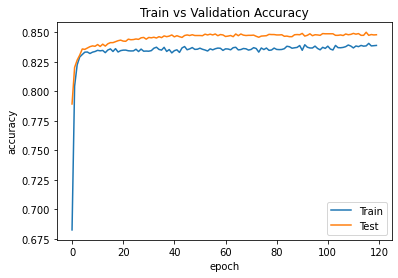

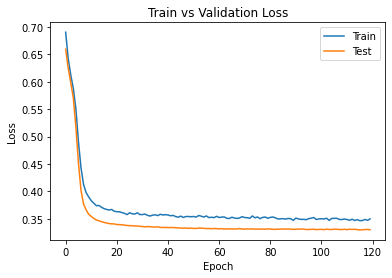

In [89]:
income_model = Sequential()
# As we have 14 input features input_dim = 14, Dense is the number of neurons in hidden layer, Activation function is Relu
income_model.add(Dense(16, input_dim = 12, activation = 'relu'))
income_model.add(Dense(8, activation = 'relu'))
income_model.add(Dense(4, activation = 'relu'))
income_model.add(Dropout(0.2))
#As this is a classification problem our Dense will be 1 and activation function will be sigmoid
income_model.add(Dense(1, activation = 'sigmoid'))

#Loss function we use here is Mean Squared Error
income_model.compile(loss = 'binary_crossentropy',optimizer = 'RMSprop', metrics = ['accuracy'])

history = income_model.fit(X_train, y_train, epochs = 120, batch_size = 300, validation_data=(X_test, y_test))

evaluate_train = income_model.evaluate(X_train, y_train, verbose=0)
evaluate_test = income_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', round(evaluate_test[0],4)*100)
print('Test accuracy:', round(evaluate_test[1],4)*100)
print('Train loss:', round(evaluate_train[0],4)*100)
print('Train accuracy:', round(evaluate_train[1],4)*100)


train_acc3.append(evaluate_train[1])
test_acc3.append(evaluate_test[1])
train_loss3.append(evaluate_train[0])
test_loss3.append(evaluate_test[0])

  # Train vs Test Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Train vs Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Train vs Test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()



Method 1 - Early Stopping

Epoch 1/50
82/82 [==============================] - 1s 7ms/step - loss: 0.5317 - accuracy: 0.7646 - val_loss: 0.4489 - val_accuracy: 0.7892
Epoch 2/50
82/82 [==============================] - 0s 5ms/step - loss: 0.4470 - accuracy: 0.8101 - val_loss: 0.3857 - val_accuracy: 0.8229
Epoch 3/50
82/82 [==============================] - 0s 5ms/step - loss: 0.4212 - accuracy: 0.8214 - val_loss: 0.3704 - val_accuracy: 0.8296
Epoch 4/50
82/82 [==============================] - 0s 5ms/step - loss: 0.4069 - accuracy: 0.8283 - val_loss: 0.3608 - val_accuracy: 0.8377
Epoch 5/50
82/82 [==============================] - 0s 5ms/step - loss: 0.3990 - accuracy: 0.8316 - val_loss: 0.3561 - val_accuracy: 0.8408
Epoch 6/50
82/82 [==============================] - 0s 6ms/step - loss: 0.3927 - accuracy: 0.8316 - val_loss: 0.3524 - val_accuracy: 0.8408
Epoch 7/50
82/82 [==============================] - 0s 6ms/step - loss: 0.3893 - accuracy: 0.8348 - val_loss: 0.3496 - val_accuracy: 0.8418
Epoch 8/50
82/82 [==

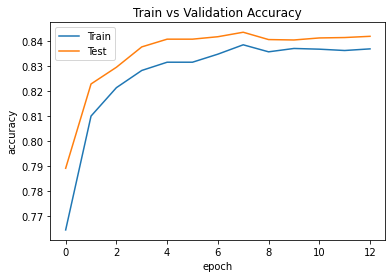

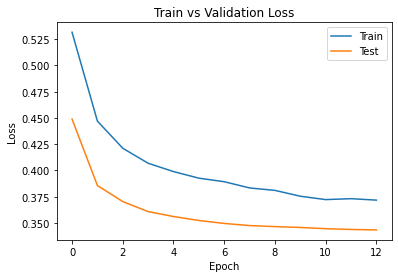

In [90]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    )


income_model = Sequential()
# As we have 14 input features input_dim = 14, Dense is the number of neurons in hidden layer, Activation function is Relu
income_model.add(Dense(16, input_dim = 12, activation = 'relu'))
income_model.add(Dense(8, activation = 'relu'))
income_model.add(Dense(4, activation = 'relu'))
income_model.add(Dropout(0.2))
#As this is a classification problem our Dense will be 1 and activation function will be sigmoid
income_model.add(Dense(1, activation = 'sigmoid'))

#Loss function we use here is Mean Squared Error
income_model.compile(loss = 'binary_crossentropy',optimizer = 'RMSprop', metrics = ['accuracy'])
history = income_model.fit(X_train, y_train, epochs = 50, batch_size = 300, validation_data=(X_test, y_test), callbacks=[callback], verbose=1)

evaluate_train = income_model.evaluate(X_train, y_train, verbose=0)
evaluate_test = income_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', round(evaluate_test[0],4)*100)
print('Test accuracy:', round(evaluate_test[1],4)*100)
print('Train loss:', round(evaluate_train[0],4)*100)
print('Train accuracy:', round(evaluate_train[1],4)*100)


train_acc3.append(evaluate_train[1])
test_acc3.append(evaluate_test[1])
train_loss3.append(evaluate_train[0])
test_loss3.append(evaluate_test[0])

  # Train vs Test Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Train vs Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Train vs Test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

Method 2 - K-Fold

------------------------------------------------------------------------
Performing Training for Fold Number  1 ...
Test loss: 35.13
Test accuracy: 84.05
Train loss: 34.089999999999996
Train accuracy: 84.86


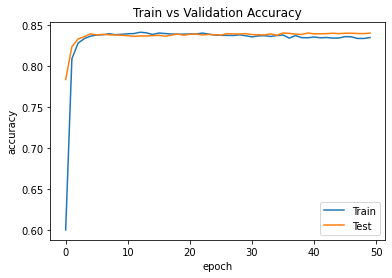

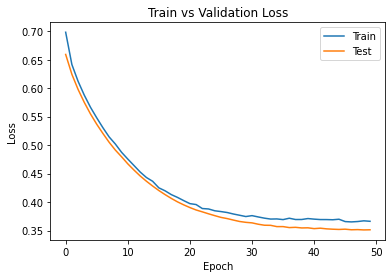

------------------------------------------------------------------------
------------------------------------------------------------------------
Performing Training for Fold Number  2 ...
Test loss: 33.06
Test accuracy: 84.59
Train loss: 32.64
Train accuracy: 84.72


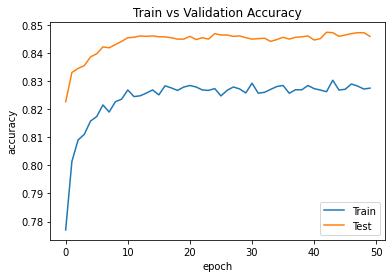

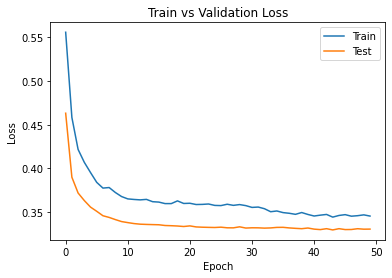

------------------------------------------------------------------------
------------------------------------------------------------------------
Performing Training for Fold Number  3 ...
Test loss: 33.45
Test accuracy: 84.2
Train loss: 32.940000000000005
Train accuracy: 84.63000000000001


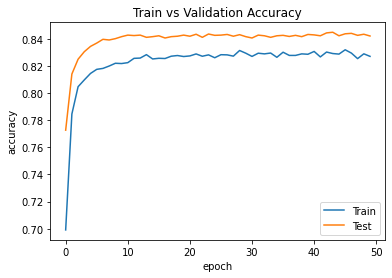

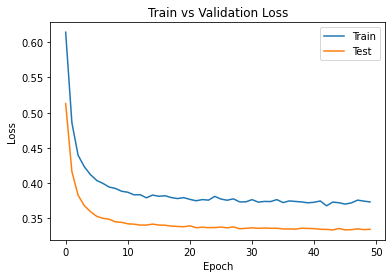

------------------------------------------------------------------------
------------------------------------------------------------------------
Performing Training for Fold Number  4 ...
Test loss: 32.879999999999995
Test accuracy: 84.34
Train loss: 32.39
Train accuracy: 85.02


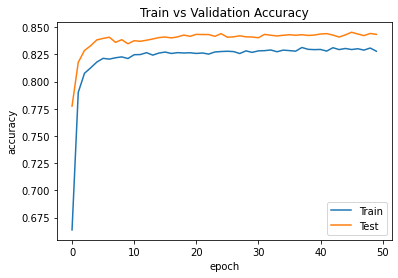

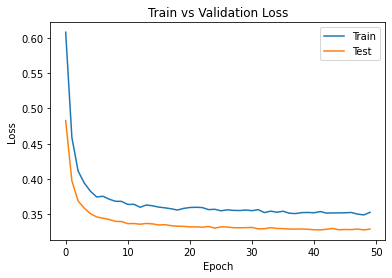

------------------------------------------------------------------------
------------------------------------------------------------------------
Performing Training for Fold Number  5 ...
Test loss: 33.17
Test accuracy: 84.55
Train loss: 32.31
Train accuracy: 84.68


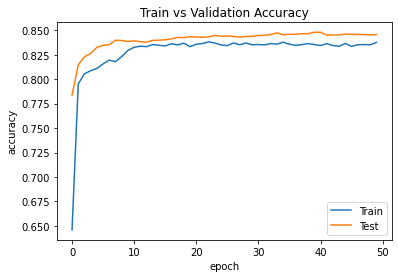

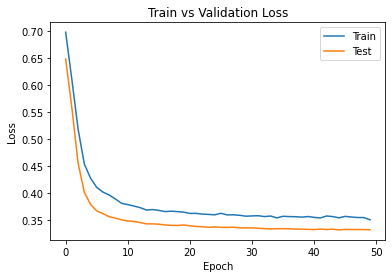

------------------------------------------------------------------------


In [91]:
from sklearn.model_selection import KFold

# Merge labels and targets
labels = np.concatenate((X_train, X_test), axis=0)
outputs = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
kf = KFold(n_splits=5, random_state=None, shuffle=True)

# K-fold Cross Validation model evaluation
iter = 1
for train_index, test_index in kf.split(labels, outputs):

  income_model = Sequential()
  # As we have 14 input features input_dim = 14, Dense is the number of neurons in hidden layer, Activation function is Relu
  income_model.add(Dense(16, input_dim = 12, activation = 'relu'))
  income_model.add(Dense(8, activation = 'relu'))
  income_model.add(Dense(4, activation = 'relu'))
  income_model.add(Dropout(0.2))
  #As this is a classification problem our Dense will be 1 and activation function will be sigmoid
  income_model.add(Dense(1, activation = 'sigmoid'))

  #Loss function we use here is Mean Squared Error
  income_model.compile(loss = 'binary_crossentropy',optimizer = 'RMSprop', metrics = ['accuracy'])

  print('------------------------------------------------------------------------')
  print(f'Performing Training for Fold Number  {iter} ...')

  history = income_model.fit(labels[train_index], outputs[train_index], epochs = 50, batch_size = 300, validation_data=(labels[test_index], outputs[test_index]), verbose=0)

  evaluate_train = income_model.evaluate(labels[train_index], outputs[train_index], verbose=0)
  evaluate_test = income_model.evaluate(labels[test_index], outputs[test_index], verbose=0)
  print('Test loss:', round(evaluate_test[0],4)*100)
  print('Test accuracy:', round(evaluate_test[1],4)*100)
  print('Train loss:', round(evaluate_train[0],4)*100)
  print('Train accuracy:', round(evaluate_train[1],4)*100)

    # Train vs Test Accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])

  plt.title('Train vs Validation Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['Train', 'Test'])
  plt.show()

  # Train vs Test loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.title('Train vs Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'])
  plt.show()

  iter = iter + 1
  print('------------------------------------------------------------------------')


Method 3 - ReduceLROnPlateau

Reference - https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau

Epoch 1/50
82/82 [==============================] - 1s 7ms/step - loss: 0.6071 - accuracy: 0.7269 - val_loss: 0.4868 - val_accuracy: 0.7850 - lr: 0.0010
Epoch 2/50
82/82 [==============================] - 0s 5ms/step - loss: 0.4539 - accuracy: 0.7865 - val_loss: 0.3965 - val_accuracy: 0.8210 - lr: 0.0010
Epoch 3/50
82/82 [==============================] - 0s 6ms/step - loss: 0.4034 - accuracy: 0.8073 - val_loss: 0.3716 - val_accuracy: 0.8267 - lr: 0.0010
Epoch 4/50
82/82 [==============================] - 0s 6ms/step - loss: 0.3879 - accuracy: 0.8122 - val_loss: 0.3627 - val_accuracy: 0.8314 - lr: 0.0010
Epoch 5/50
82/82 [==============================] - 0s 5ms/step - loss: 0.3805 - accuracy: 0.8151 - val_loss: 0.3568 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 6/50
82/82 [==============================] - 0s 5ms/step - loss: 0.3756 - accuracy: 0.8175 - val_loss: 0.3520 - val_accuracy: 0.8368 - lr: 0.0010
Epoch 7/50
82/82 [==============================] - 0s 5ms/step - loss: 0.3733 - a

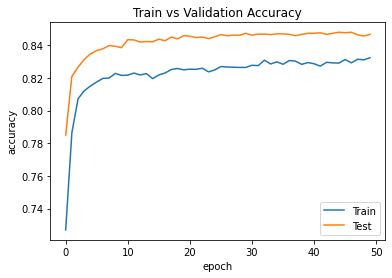

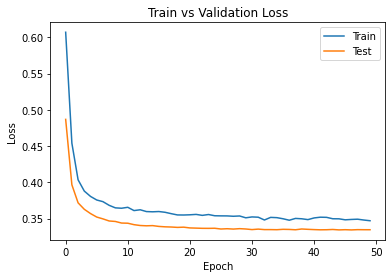

In [92]:
callback = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=10,
    verbose=1,
    mode='auto',
    min_delta=0.0001,
    cooldown=0,
    min_lr=0
)

income_model = Sequential()
# As we have 14 input features input_dim = 14, Dense is the number of neurons in hidden layer, Activation function is Relu
income_model.add(Dense(16, input_dim = 12, activation = 'relu'))
income_model.add(Dense(8, activation = 'relu'))
income_model.add(Dense(4, activation = 'relu'))
income_model.add(Dropout(0.2))
#As this is a classification problem our Dense will be 1 and activation function will be sigmoid
income_model.add(Dense(1, activation = 'sigmoid'))

#Loss function we use here is Mean Squared Error
income_model.compile(loss = 'binary_crossentropy',optimizer = 'RMSprop', metrics = ['accuracy'])
history = income_model.fit(X_train, y_train, epochs = 50, batch_size = 300, validation_data=(X_test, y_test), callbacks=[callback], verbose=1)

evaluate_train = income_model.evaluate(X_train, y_train, verbose=0)
evaluate_test = income_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', round(evaluate_test[0],4)*100)
print('Test accuracy:', round(evaluate_test[1],4)*100)
print('Train loss:', round(evaluate_train[0],4)*100)
print('Train accuracy:', round(evaluate_train[1],4)*100)


train_acc3.append(evaluate_train[1])
test_acc3.append(evaluate_test[1])
train_loss3.append(evaluate_train[0])
test_loss3.append(evaluate_test[0])

  # Train vs Test Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Train vs Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Train vs Test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

Method 4 - LearningRateScheduler

Reference - https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
82/82 [==============================] - 1s 7ms/step - loss: 0.5234 - accuracy: 0.7506 - val_loss: 0.4399 - val_accuracy: 0.7523 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999980475013564.
Epoch 2/100
82/82 [==============================] - 0s 6ms/step - loss: 0.4270 - accuracy: 0.7506 - val_loss: 0.4003 - val_accuracy: 0.7523 - lr: 1.0000e-03

Epoch 3: LearningRateScheduler setting learning rate to 0.0009999940684607064.
Epoch 3/100
82/82 [==============================] - 0s 5ms/step - loss: 0.4037 - accuracy: 0.7927 - val_loss: 0.3879 - val_accuracy: 0.8236 - lr: 9.9999e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.000999988110387376.
Epoch 4/100
82/82 [==============================] - 0s 5ms/step - loss: 0.3922 - accuracy: 0.8235 - val_loss: 0.3820 - val_accuracy: 0.8307 - lr: 9.9999e-04

Epoch 5: LearningRateScheduler setting learning rate

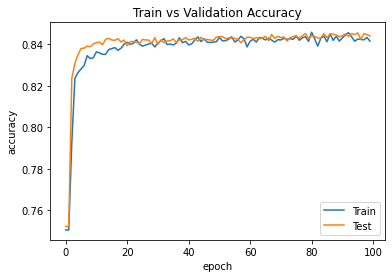

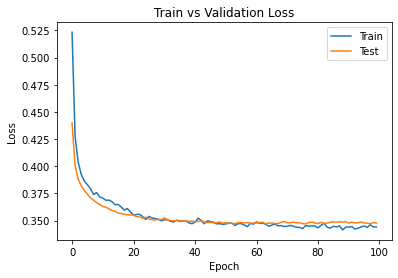

In [93]:
initial_learning_rate = 0.0001
epochs = 50
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

income_model = Sequential()
# As we have 14 input features input_dim = 14, Dense is the number of neurons in hidden layer, Activation function is Relu
income_model.add(Dense(16, input_dim = 12, activation = 'relu'))
income_model.add(Dense(8, activation = 'relu'))
income_model.add(Dense(4, activation = 'relu'))
income_model.add(Dropout(0.2))
#As this is a classification problem our Dense will be 1 and activation function will be sigmoid
income_model.add(Dense(1, activation = 'sigmoid'))

#Loss function we use here is Mean Squared Error
income_model.compile(loss = 'binary_crossentropy',optimizer = 'RMSprop', metrics = ['accuracy'])
history = income_model.fit(X_train, y_train, epochs = 100, batch_size = 300, validation_data=(X_test, y_test), callbacks=[keras.callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)], verbose = 1)

evaluate_train = income_model.evaluate(X_train, y_train, verbose=0)
evaluate_test = income_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', round(evaluate_test[0],4)*100)
print('Test accuracy:', round(evaluate_test[1],4)*100)
print('Train loss:', round(evaluate_train[0],4)*100)
print('Train accuracy:', round(evaluate_train[1],4)*100)


  # Train vs Test Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Train vs Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Train vs Test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [94]:
income_model.save("nn_model_w_o_w8.h5")
print("Saved model to disk")

Saved model to disk
